In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5869 sha256=ca415faaf201bbba0506481a24436d91cf10cf19175c20af731f4ae20a5c2925
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
Final ='./drive/MyDrive/TESS.zip'
zip_ref=zipfile.ZipFile(Final,'r')
zip_ref.extractall('./')
zip_ref.close()

In [ ]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

In [ ]:
df = pd.read_csv('./drive/MyDrive/TESS_mapping.csv')
df.set_index('fname', inplace=True)

In [ ]:
for f in df.index:
  print(f)
  rate, signal = wavfile.read('TESS/'+f)
  df.at[f, 'length'] = signal.shape[0]/rate

In [ ]:
df

,label,length
fname,,
OAF_back_angry.wav,angry,1.539035
OAF_back_disgust.wav,disgust,2.260342
OAF_back_fear.wav,fearful,1.727124
OAF_back_happy.wav,happy,2.000942
OAF_back_neutral.wav,neutral,2.043418
...,...,...
YAF_youth_fear.wav,fearful,1.745064
YAF_youth_happy.wav,happy,2.111207
YAF_youth_neutral.wav,neutral,2.153805


from matplotlib import pyplot as plt
df['length'].plot(kind='hist', bins=20, title='length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['length'].plot(kind='line', figsize=(8, 4), title='length')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='length', y='label', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

In [ ]:
classes

['angry', 'disgust', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [ ]:
class_dist

label
angry        1.840465
disgust      2.448545
fearful      1.658676
happy        1.972935
neutral      2.054510
sad          2.402094
surprised    2.007777
Name: length, dtype: float64

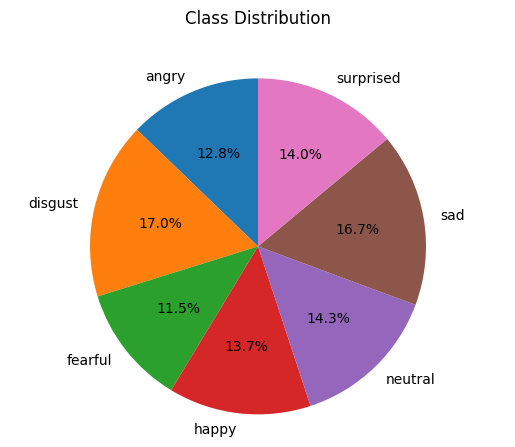

In [ ]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [ ]:
df.reset_index(inplace=True)

In [ ]:
signals = {}
fft = {}
fbank = {}
mfccs = {}

In [ ]:
def calc_fft(y, rate):
  n=len(y)
  freq=np.fft.rfftfreq(n, d=1/rate)
  Y = abs(np.fft.rfft(y)/n)
  return (Y, freq)

In [ ]:
def plot_signals(signals):
  fig, axes=plt.subplots(nrows=2, ncols=4, sharex=False, sharey=True, figsize=(20,5))
  fig.suptitle('Time Series', size=16)
  i=0
  for x in range(2):
    for y in range(3):
      axes[x,y].set_title(list(signals.keys())[i])
      axes[x,y].plot(list(signals.values())[i])
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i+=1

In [ ]:
def plot_fft(fft):
  fig, axes=plt.subplots(nrows=2, ncols=4, sharex=False, sharey=True, figsize=(20,5))
  fig.suptitle('Fourier Transforms', size=16)
  i=0
  for x in range(2):
    for y in range(3):
      data = list(fft.values())[i]
      Y, freq=data[0], data[1]
      axes[x,y].set_title(list(fft.keys())[i])
      axes[x,y].plot(freq, Y)
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i+=1

In [ ]:
def plot_fbank(fbank):
  fig, axes=plt.subplots(nrows=2, ncols=4, sharex=False, sharey=True, figsize=(20,5))
  fig.suptitle('Filter Bank Coefficients Transforms', size=16)
  i=0
  for x in range(2):
    for y in range(3):
      axes[x,y].set_title(list(fbank.keys())[i])
      axes[x,y].imshow(list(fbank.values())[i], cmap='hot', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i+=1

In [ ]:
def plot_mfccs(mfccs):
  fig, axes=plt.subplots(nrows=2, ncols=4, sharex=False, sharey=True, figsize=(20,5))
  fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
  i=0
  for x in range(2):
    for y in range(3):
      axes[x,y].set_title(list(mfccs.keys())[i])
      axes[x,y].imshow(list(fbank.values())[i], cmap='hot', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i+=1

In [ ]:
def envelope(y, rate, threshold):
  mask = []
  y = pd.Series(y).apply(np.abs)
  y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
  for mean in y_mean:
    if mean > threshold:
      mask.append(True)
    else:
      mask.append(False)
  return mask

In [ ]:
for c in classes:
  wav_file=df[df.label==c].iloc[0,0]
  signal, rate=librosa.load('TESS/'+wav_file, sr=24414)
  mask=envelope(signal, rate, 0.001)
  signal = signal[mask]
  signals[c]=signal
  fft[c]=calc_fft(signal, rate)
  bank=logfbank(signal[:rate], rate, nfilt=26, nfft=1200).T
  fbank[c]=bank
  mel= mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=1200).T
  mfccs[c]=mel


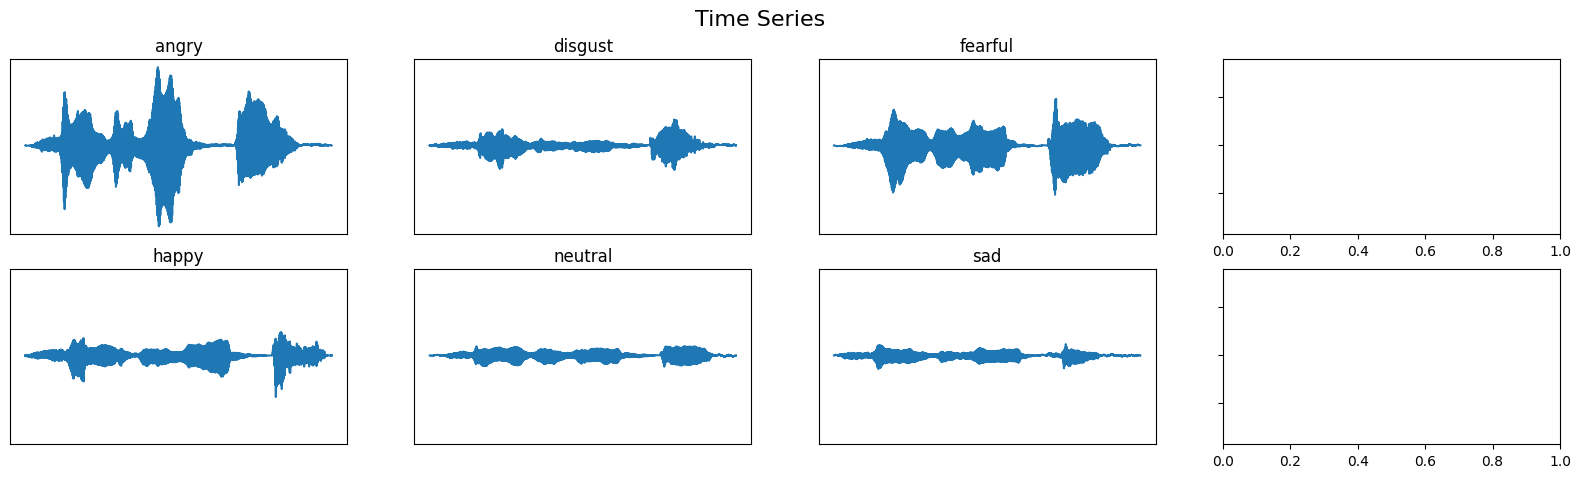

In [ ]:
plot_signals(signals)
plt.show()

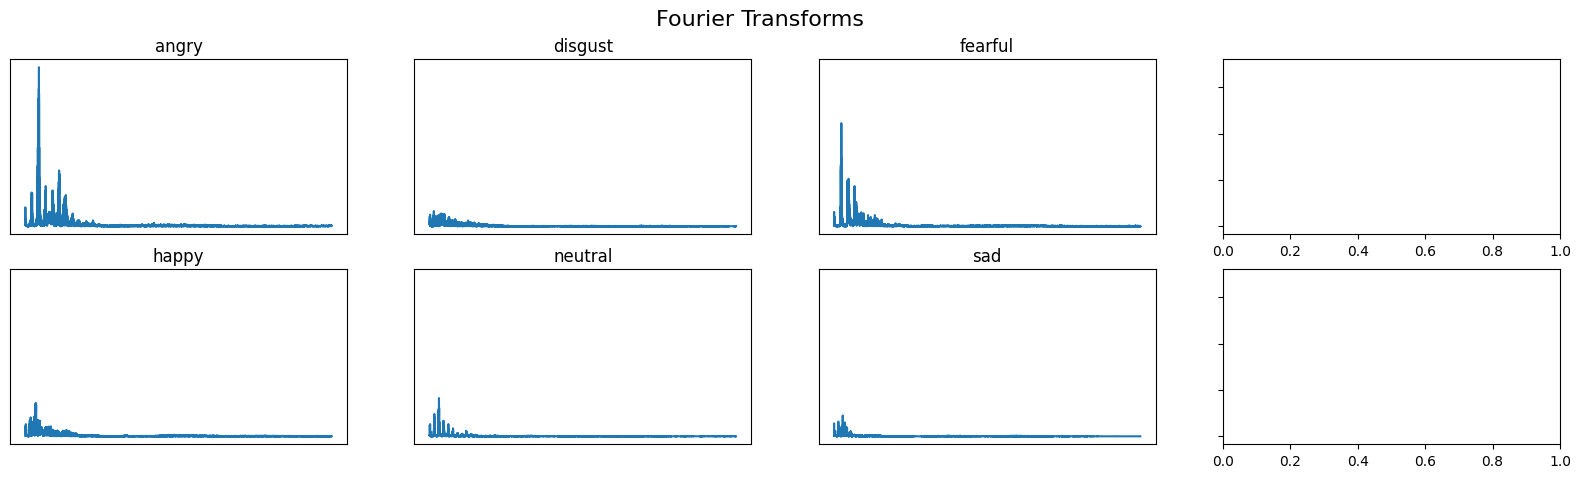

In [ ]:
plot_fft(fft)
plt.show()

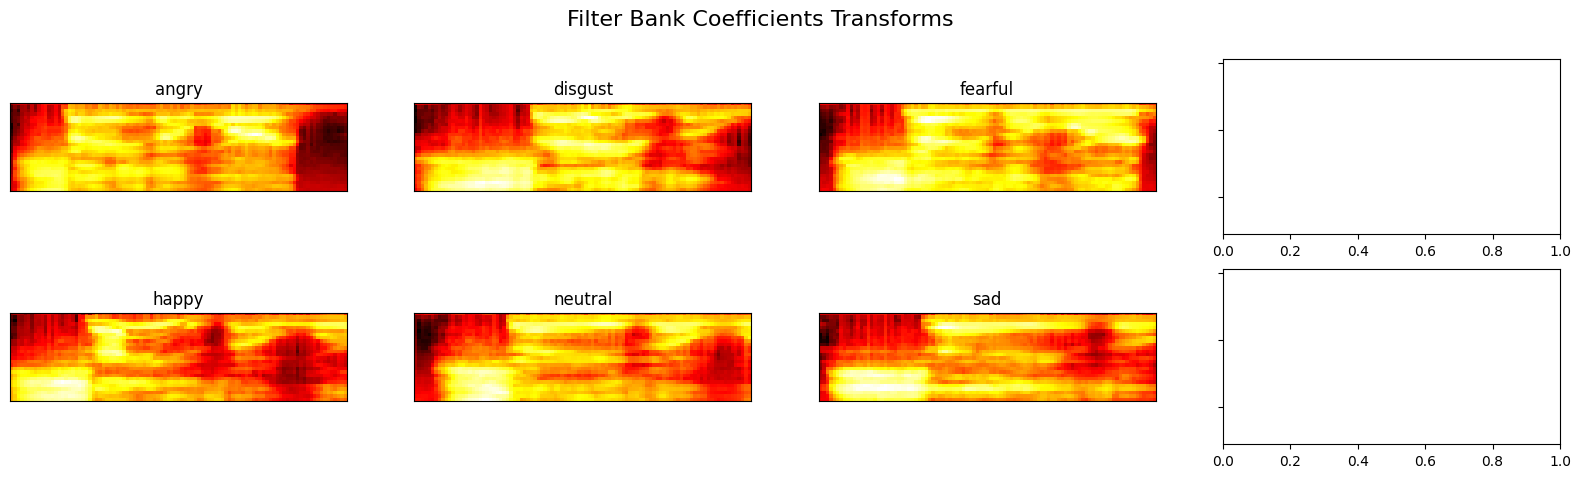

In [ ]:
plot_fbank(fbank)
plt.show()

In [ ]:
!mkdir Clean_TESS

In [ ]:
if len(os.listdir('Clean_TESS'))==0:
  for f in tqdm(df.fname):
    signal, rate = librosa.load('TESS/'+f, sr=16000)
    mask=envelope(signal, rate, 0.0005)
    wavfile.write(filename='Clean_TESS/'+f, rate=rate,data=signal[mask])

100%|██████████| 2798/2798 [00:25<00:00, 111.39it/s]


In [ ]:
!zip -r ./Clean_TESS.zip ./Clean_TESS

In [ ]:
import shutil
shutil.move('./Clean_TESS.zip', './drive/MyDrive')

'./drive/MyDrive/Clean_TESS.zip'